# **Importing Modules**

In [0]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt

from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import GridSearchCV

# **Uploading the dataset**

In [2]:
url = "https://raw.githubusercontent.com/ManojCSE17/E-Commerce/master/cleaned.csv"
data = pd.read_csv(url,index_col=0)
data.head()

,Cleaned_Text,Recommended IND,Rating_Class,Sentiment,Polarity Score,Title
0,absolutely wonderful silky sexy comfortable,1,Good,1,0.8932,
1,love dress sooo pretty happen find store glad ...,1,Good,1,0.9729,
2,high hope dress really want work initially ord...,0,Bad,1,0.9427,Some major design flaws
3,love love love jumpsuit fun flirty fabulous ev...,1,Good,1,0.5727,My favorite buy!
4,shirt flattering due adjustable front tie perf...,1,Good,1,0.9291,Flattering shirt


In [3]:
data.isnull().sum()

Cleaned_Text       0
Recommended IND    0
Rating_Class       0
Sentiment          0
Polarity Score     0
Title              0
dtype: int64

In [4]:
data['Rating_Class'] = data['Rating_Class'].map({"Good":1,"Bad":0})
data.head()

,Cleaned_Text,Recommended IND,Rating_Class,Sentiment,Polarity Score,Title
0,absolutely wonderful silky sexy comfortable,1,1,1,0.8932,
1,love dress sooo pretty happen find store glad ...,1,1,1,0.9729,
2,high hope dress really want work initially ord...,0,0,1,0.9427,Some major design flaws
3,love love love jumpsuit fun flirty fabulous ev...,1,1,1,0.5727,My favorite buy!
4,shirt flattering due adjustable front tie perf...,1,1,1,0.9291,Flattering shirt


In [5]:
data.corr()

,Recommended IND,Rating_Class,Sentiment,Polarity Score
Recommended IND,1.000000,0.811082,0.321646,0.427276
Rating_Class,0.811082,1.000000,0.311262,0.427697
Sentiment,0.321646,0.311262,1.000000,0.837606
Polarity Score,0.427276,0.427697,0.837606,1.000000


# **Frequency Distibution**

In [6]:
from nltk.probability import FreqDist
words = " ".join(data['Cleaned_Text'].tolist())
fd = FreqDist(words.split())
dtf = pd.DataFrame(fd.most_common(633105),columns=['Word','Count'])
print("Length of the words used by TfidfVectorizer() for Bagging :",len(fd.most_common(633105)))
print("Frequency Distribution dataframe :")
print(dtf[5000:5010])
stp = dtf[dtf["Count"]<4]['Word'].tolist()
print("Reducing OverFitting by reducing the words in TFIDF with the help of StopWords :",len(stp))
print("Few StopWords :",stp[:5])
stp = set(stp)

Length of the words used by TfidfVectorizer() for Bagging : 15855
Frequency Distribution dataframe :
               Word  Count
5000      warehouse      3
5001      replenish      3
5002  automatically      3
5003         piling      3
5004            bam      3
5005  manufacturing      3
5006       graduate      3
5007        pliable      3
5008      gradually      3
5009          saucy      3
Reducing OverFitting by reducing the words in TFIDF with the help of StopWords : 11498
Few StopWords : ['savvy', 'relate', 'whit', 'handknit', 'subpar']


# **TfidfVectorizer()**

In [7]:
vect = TfidfVectorizer(stop_words=stp)
x = vect.fit_transform(data['Cleaned_Text'].tolist())
print("Length of words used for bagging in TFIDF :",len(vect.get_feature_names()))
print("Few Feature Names :",vect.get_feature_names()[:5])
print("")
print("TFIDF Vector : ",x.toarray()[:5])

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['akemi', 'amp', 'ampampampamp', 'ampampampampm', 'ampampampampquot', 'ampampampampt', 'ampampampquot', 'ampampampt', 'ampampll', 'ampampm', 'ampamps', 'ampampt', 'ampd', 'ampm', 'ampquot', 'ampquotno', 'ampt', 'aprã', 'bc', 'booty', 'breasts', 'can', 'chest', 'clingy', 'cloth', 'color', 'cup', 'dd', 'degree', 'didn', 'don', 'down', 'ed', 'elastic', 'especially', 'forgiving', 'good', 'im', 'is', 'it', 'kin', 'lb', 'lbs', 'll', 'out', 'pi', 'plus', 'poly', 'probably', 'pure', 'quot', 'quotdrape', 'quoti', 'quotsky', 'scratches', 'ship', 'sski', 'stone', 'sure', 'that', 'thin', 'tight', 'too', 'up', 've', 'waist', 'wool'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Length of words used for bagging in TFIDF : 4369
Few Feature Names : ['abdoman', 'ability', 'able', 'absolute', 'absolutely']

TFIDF Vector :  [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.13659199 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [8]:
type(x)

scipy.sparse.csr.csr_matrix

In [9]:
print(x.get_shape())
import scipy
from scipy.sparse import hstack
x = hstack((x,scipy.sparse.csr.csr_matrix(data['Recommended IND']).T))
x = hstack((x,scipy.sparse.csr.csr_matrix(data['Polarity Score']).T))
x = hstack((x,scipy.sparse.csr.csr_matrix(data['Sentiment']).T))

x = x.toarray()
print(x.shape)

#------------------------------------------------------------------------

y = data['Rating_Class'].tolist()
y = np.array(y)
print(y[:5])
print(y.shape)

(22641, 4369)
(22641, 4372)
[1 1 0 1 1]
(22641,)


In [10]:
print(x.shape)

(22641, 4372)


# **Spliting data into Training(%70) and Testing(%30)**

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=15)

In [12]:
Comparision = pd.DataFrame(columns=["Model","Accuracy"])
print(len(Comparision))
Comparision

0


,Model,Accuracy


# **BernoulliNB**

In [0]:
from sklearn.naive_bayes import BernoulliNB

In [14]:
model1 = GridSearchCV(BernoulliNB(),{'alpha':[0.01,0.1]},scoring='roc_auc',cv=5,refit='AUC')
model1.fit(x_train,y_train)
df1 = pd.DataFrame(model1.cv_results_)
df1.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.601074,0.107263,0.119484,0.001752,0.01,{'alpha': 0.01},0.937358,0.945185,0.928909,0.941234,0.946831,0.939904,0.006403,2
1,0.518824,0.004380,0.120426,0.001520,0.1,{'alpha': 0.1},0.947682,0.955720,0.946788,0.951336,0.953639,0.951033,0.003409,1


In [15]:
prediction = model1.predict(x_test)
print(accuracy_score(y_test,prediction))
Comparision.loc[len(Comparision)] = ["BernoulliNB",accuracy_score(y_test,prediction)*100]

0.9038716325629325


In [16]:
Comparision

,Model,Accuracy
0,BernoulliNB,90.387163


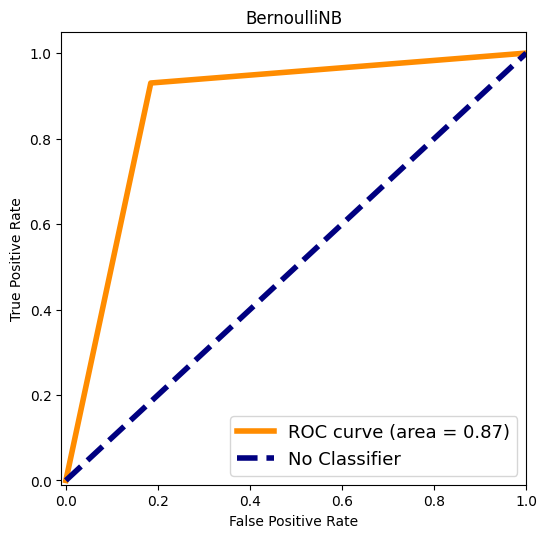

In [17]:
prediction = model1.predict(x_test)
fpr_bnb,tpr_bnb,_ = roc_curve(y_test,prediction)
roc_auc_bnb = auc(fpr_bnb,tpr_bnb)
plt.figure(figsize=(6,6),dpi=100)
plt.plot(fpr_bnb, tpr_bnb, color='darkorange', lw=4, label='ROC curve (area = {:0.2f})'.format(roc_auc_bnb))
plt.plot([0, 1], [0, 1], color='navy', lw=4, linestyle='--',label='No Classifier')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('BernoulliNB')
plt.legend(loc='lower right', fontsize=13)

# **SGDClassifier**

In [18]:
from sklearn.linear_model import SGDClassifier
model2 = GridSearchCV(SGDClassifier(loss='hinge',penalty='l2'),{'alpha':[0.001,0.01]},scoring='roc_auc',cv=5)
model2.fit(x_train,y_train)
df2 = model2.cv_results_
df2 = pd.DataFrame(df2)
print(df2) 

   mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0       1.186343      0.048119  ...        0.002856                2
1       0.958325      0.002436  ...        0.002492                1

[2 rows x 14 columns]


In [19]:
prediction = model2.predict(x_test)
print(accuracy_score(y_test,prediction))
Comparision.loc[len(Comparision)] = ["SGD Classifier",accuracy_score(y_test,prediction)*100]
Comparision

0.9349330192845576


,Model,Accuracy
0,BernoulliNB,90.387163
1,SGD Classifier,93.493302


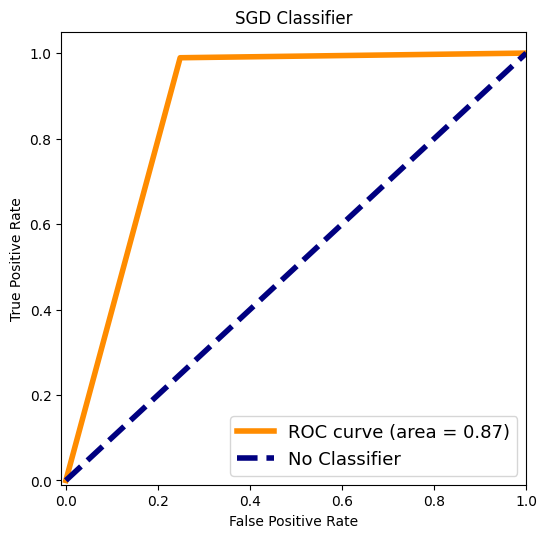

In [20]:
prediction = model2.predict(x_test)
fpr,tpr,_ = roc_curve(y_test,prediction)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(6,6),dpi=100)
plt.plot(fpr, tpr, color='darkorange', lw=4, label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=4, linestyle='--',label='No Classifier')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SGD Classifier')
plt.legend(loc='lower right', fontsize=13)

# **Logistic Regression**

In [0]:
from sklearn.linear_model import LogisticRegression

In [22]:
model6 = GridSearchCV(LogisticRegression(),param_grid={"max_iter":[1000,1500]},scoring='roc_auc',cv=5)
model6.fit(x_train,y_train)
df6 = model6.cv_results_
df6 = pd.DataFrame(df6)
print(df6) 

   mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0       5.223182      0.850652  ...        0.002132                1
1       4.938552      0.911173  ...        0.002132                1

[2 rows x 14 columns]


In [23]:
prediction = model6.predict(x_test)
print(accuracy_score(prediction,y_test))
Comparision.loc[len(Comparision)] = ["Logistic Regression",accuracy_score(y_test,prediction)]

0.9343441778301192


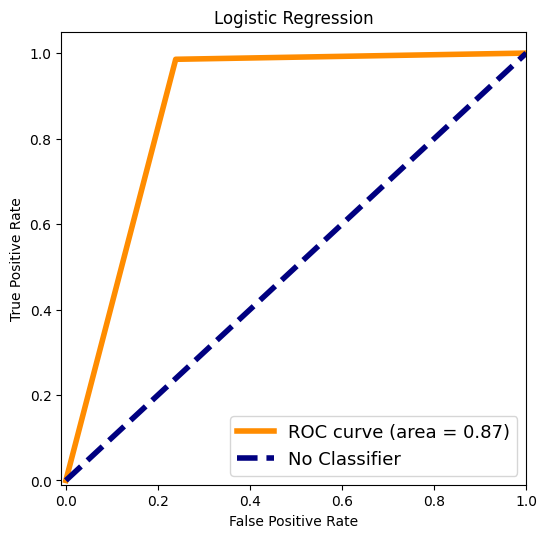

In [24]:
prediction = model6.predict(x_test)
fpr,tpr,_ = roc_curve(y_test,prediction)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(6,6),dpi=100)
plt.plot(fpr, tpr, color='darkorange', lw=4, label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=4, linestyle='--',label='No Classifier')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression')
plt.legend(loc='lower right', fontsize=13)

# **XGBoostClassifier**

In [25]:
from xgboost import XGBClassifier
model3 = GridSearchCV(XGBClassifier(),{'learning_rate':[0.1],'n_estimators':[100]},scoring='roc_auc',cv=5)
model3.fit(x_train,y_train)
df3 = pd.DataFrame(model3.cv_results_)
print(df3)

   mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0     109.050993      0.551126  ...        0.002746                1

[1 rows x 15 columns]


In [26]:
prediction = model3.predict(x_test)
print(accuracy_score(y_test,prediction))
Comparision.loc[len(Comparision)] = ["XGBoost Classifier",accuracy_score(y_test,prediction)]

0.9346385985573384


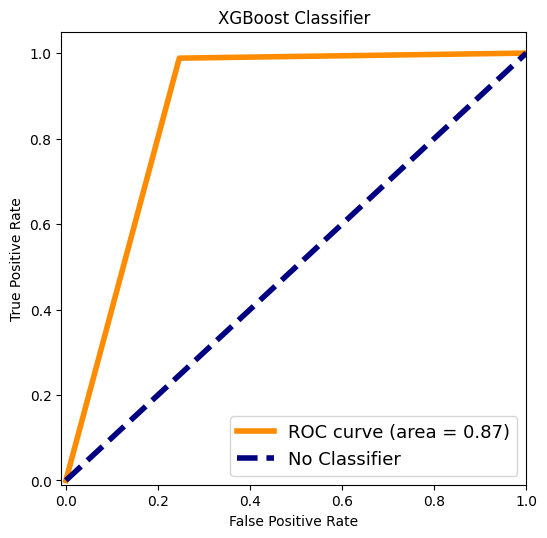

In [27]:
prediction = model3.predict(x_test)
fpr,tpr,_ = roc_curve(y_test,prediction)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(6,6),dpi=100)
plt.plot(fpr, tpr, color='darkorange', lw=4, label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=4, linestyle='--',label='No Classifier')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost Classifier')
plt.legend(loc='lower right', fontsize=13)

# **Decision Tree Classifier**

In [0]:
from sklearn import tree

In [29]:
model5 = GridSearchCV(tree.DecisionTreeClassifier(),{'random_state':[3]},scoring='roc_auc',cv=5)
model5.fit(x_train,y_train)
df5 = pd.DataFrame(model5.cv_results_)
df5

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,69.630386,3.185798,0.045103,0.002946,3,{'random_state': 3},0.829997,0.854939,0.8498,0.85865,0.850673,0.848812,0.009928,1


In [30]:
prediction = model5.predict(x_test)
print(accuracy_score(y_test,prediction))
Comparision.loc[len(Comparision)] = ["Decision Tree Classifier",accuracy_score(y_test,prediction)]

0.8915059620197262


[Text(232.3258091526653, 216.44256880733946, 'X[4369] <= 0.5\ngini = 0.352\nsamples = 6793\nvalue = [1551, 5242]'),
 Text(193.85156250120986, 214.44770642201834, 'X[304] <= 0.257\ngini = 0.089\nsamples = 1223\nvalue = [1166, 57]'),
 Text(192.30870535836596, 212.45284403669726, 'X[4129] <= 0.138\ngini = 0.085\nsamples = 1220\nvalue = [1166, 54]'),
 Text(189.22299107267816, 210.45798165137614, 'X[4282] <= 0.208\ngini = 0.08\nsamples = 1216\nvalue = [1165, 51]'),
 Text(187.68013392983426, 208.46311926605503, 'X[3043] <= 0.206\ngini = 0.077\nsamples = 1214\nvalue = [1165, 49]'),
 Text(186.13727678699036, 206.46825688073395, 'X[2727] <= 0.217\ngini = 0.075\nsamples = 1212\nvalue = [1165, 47]'),
 Text(184.59441964414646, 204.47339449541283, 'X[192] <= 0.324\ngini = 0.072\nsamples = 1210\nvalue = [1165, 45]'),
 Text(183.05156250130256, 202.47853211009175, 'X[2391] <= 0.104\ngini = 0.069\nsamples = 1208\nvalue = [1165, 43]'),
 Text(178.80870535848183, 200.48366972477064, 'X[2178] <= 0.325\ngin

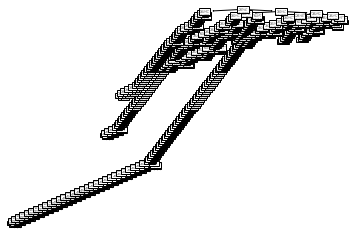

In [31]:
 tree.plot_tree(tree.DecisionTreeClassifier().fit(x_test, y_test)) 

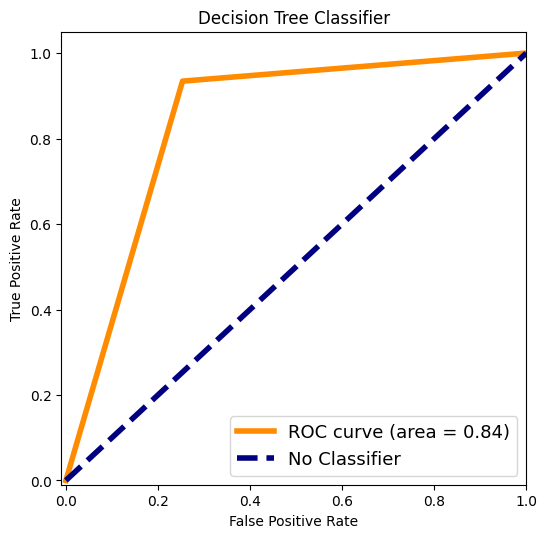

In [32]:
prediction = model5.predict(x_test)
fpr,tpr,_ = roc_curve(y_test,prediction)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(6,6),dpi=100)
plt.plot(fpr, tpr, color='darkorange', lw=4, label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=4, linestyle='--',label='No Classifier')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Classifier')
plt.legend(loc='lower right', fontsize=13)

# **Random Forest Classifier** 

In [0]:
 from sklearn.ensemble import RandomForestClassifier

In [34]:
model6 = GridSearchCV(RandomForestClassifier(),{'n_estimators':[100,200,300],'random_state':[3]},scoring='roc_auc',cv=5)
model6.fit(x_train,y_train)
df6 = pd.DataFrame(model6.cv_results_)
df6

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,35.699102,0.629892,0.324861,0.002760,100,3,"{'n_estimators': 100, 'random_state': 3}",0.950155,0.956235,0.955526,0.957642,0.955243,0.954960,0.002542,3
1,70.968023,1.216125,0.610690,0.011731,200,3,"{'n_estimators': 200, 'random_state': 3}",0.952450,0.959882,0.956167,0.959736,0.957689,0.957185,0.002738,2
2,106.000859,0.994706,0.853373,0.009477,300,3,"{'n_estimators': 300, 'random_state': 3}",0.953881,0.961022,0.956395,0.960791,0.959010,0.958220,0.002729,1


In [35]:
prediction = model6.predict(x_test)
print(accuracy_score(y_test,prediction))
Comparision.loc[len(Comparision)] = ["Random Forest Classifier",accuracy_score(y_test,prediction)]

0.9325776534668041


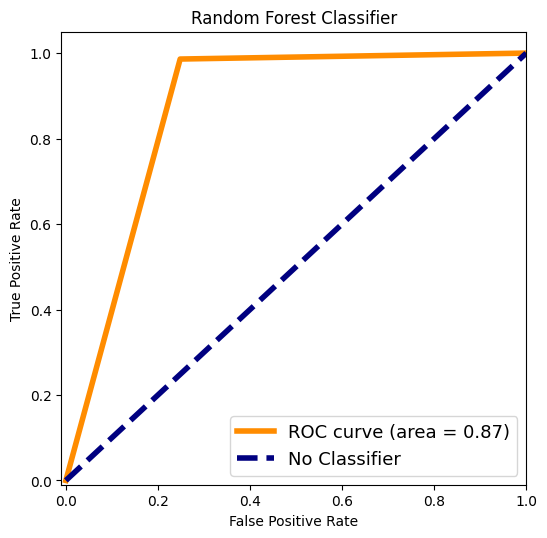

In [36]:
prediction = model6.predict(x_test)
fpr,tpr,_ = roc_curve(y_test,prediction)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(6,6),dpi=100)
plt.plot(fpr, tpr, color='darkorange', lw=4, label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=4, linestyle='--',label='No Classifier')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.legend(loc='lower right', fontsize=13)

# **Keras Module**

In [37]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [0]:
# define the keras model
model = Sequential()
model.add(Dense(64, input_dim=4372, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
# fit the keras model on the dataset
model.fit(x_train, y_train, epochs=250, batch_size=10,verbose=0)
# evaluate the keras model
_, accuracy = model.evaluate(x_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

15848/15848 [==============================] - 1s 48us/step
Accuracy: 100.00


In [41]:
# make class predictions with the model
prediction = model.predict_classes(x_test)
print(accuracy_score(prediction,y_test))
Comparision.loc[len(Comparision)] = ["Keras NN",accuracy_score(y_test,prediction)]

0.9153540409244811


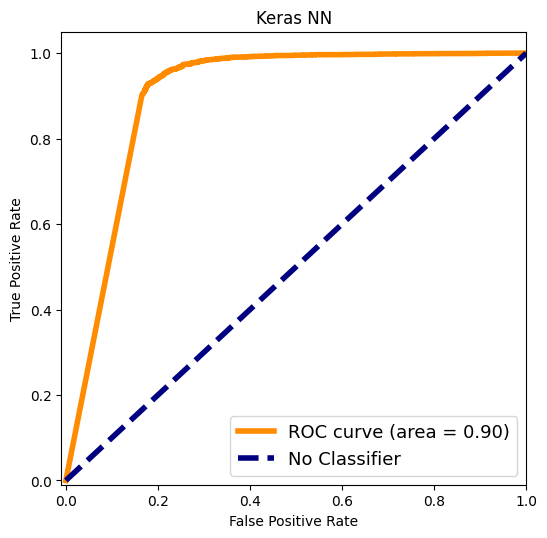

In [51]:
prediction = model.predict(x_test)
fpr,tpr,_ = roc_curve(y_test,prediction)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(6,6),dpi=100)
plt.plot(fpr, tpr, color='darkorange', lw=4, label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=4, linestyle='--',label='No Classifier')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Keras NN')
plt.legend(loc='lower right', fontsize=13)

# **KNN Classifier**

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
model4 = GridSearchCV(KNeighborsClassifier(),{'n_neighbors':[47,51]},scoring='roc_auc',cv=5)
model4.fit(x_train,y_train)
df4 = pd.DataFrame(model4.cv_results_)
print(df4.head())

   mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0       7.574275      0.067472  ...        0.006281                2
1       7.545586      0.037688  ...        0.006283                1

[2 rows x 14 columns]


In [45]:
prediction = model4.predict(x_test)
print(accuracy_score(y_test,prediction))
Comparision.loc[len(Comparision)] = ["KNN Classifier",accuracy_score(y_test,prediction)]

0.9349330192845576


In [46]:
df4

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,7.574275,0.067472,326.617295,1.276844,47,{'n_neighbors': 47},0.930468,0.94593,0.941516,0.948972,0.941125,0.941602,0.006281,2
1,7.545586,0.037688,326.984838,1.462419,51,{'n_neighbors': 51},0.931601,0.94556,0.941260,0.950717,0.941654,0.942159,0.006283,1


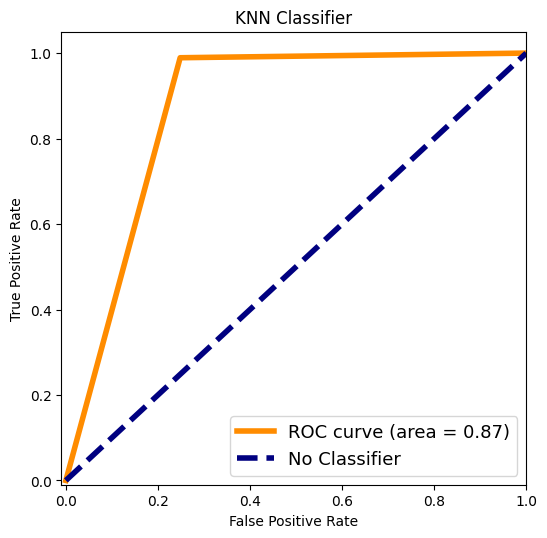

In [52]:
prediction = model4.predict(x_test)
fpr,tpr,_ = roc_curve(y_test,prediction)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(6,6),dpi=100)
plt.plot(fpr, tpr, color='darkorange', lw=4, label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=4, linestyle='--',label='No Classifier')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN Classifier')
plt.legend(loc='lower right', fontsize=13)

# **Model Analysis**

In [48]:
exp = Comparision.copy()
exp['Accuracy'] = exp['Accuracy'].map(lambda x: x*100 if(x<1) else x) 
exp


,Model,Accuracy
0,BernoulliNB,90.387163
1,SGD Classifier,93.493302
2,Logistic Regression,93.434418
3,XGBoost Classifier,93.463860
4,Decision Tree Classifier,89.150596
5,Random Forest Classifier,93.257765
6,Keras NN,91.535404
7,KNN Classifier,93.493302
